#Amazon Ratings Prediction

Dataset: https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset

The amazaon products dataset is divided into 142 subcategories. Each subcategory is represented by a .csv file. We preprocessed 5 subcategories. The categories are: televisions, amazon fashion, Luxury Beauty

## Column Description
1. __name__ : The name of the product.
2. __main_category__ : The main category of the product belong.
3. __sub_category__ : The main category of the product belong.
4. __image__ : The image of the product look like.
5. __link__ : The amazon website reference link of the product.
6. __ratings__ : The ratings given by amazon customers of the product.
7. __no of ratings__ : The number of ratings given to this product in amazon shopping.
8. __discount_price__ : The discount prices of the product in rupees.
9. __actual_price__ : The actual MRP of the product in rupees.
###Later added
10. __actual_price_usd__ : The actual MRP of the product converted to US dollars at an exchange rate of 1 USD = 82.99 rupees.

11. __discount_price_usd:__ : The discounted price of the product converted to US dollars at an exchange rate of 1 USD = 82.99 rupees.

12. __discount_rate:__ : The percentage of discount applied to the product, calculated as ((actual_price_usd - discount_price_usd) / actual_price_usd) * 100.

12. __agg_rating__: The aggregate rating of the product, calculated by multiplying the ratings with the number of ratings.


## Scales
### Categorical and Textual Columns:
- name
- main_category
- sub_category
- image
- link

### Numerical Columns:
- no_of_ratings
- discount_price
- actual_price

In [ ]:
!git clone https://github.com/mickjeon/amazon_sales_prediction.git

fatal: destination path 'amazon_sales_prediction' already exists and is not an empty directory.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

# Amazon Fashion

## Number of observation
The raw data consists of __2352__ observations. After excluding null values and data with random strings in the price field and ratings, the pre-processed data consists of a total of __1985__ observations.


In [ ]:
amz_fashion_raw_data = pd.read_csv("amazon_sales_prediction/dataset/Amazon Fashion.csv")
amz_fashion_raw_data.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA+++ F...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51TSC6Uogx...,https://www.amazon.in/Aqualogica-Sunscreen-Pro...,4.2,"3,628",₹351,₹399
1,MARVIK Soft Silicone Adjustable Band Strap Com...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51vYDop04S...,https://www.amazon.in/MARVIK-Silicone-Adjustab...,3.9,291,₹249,₹999
2,108 Panchatantra Stories for Children (Illustr...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/81VJ+MAc7Y...,https://www.amazon.in/108-Panchatantra-Stories...,4.4,"2,950",₹125,₹160
3,Black and White and Blue: Adult Cinema From th...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51RIhaW3t1...,https://www.amazon.in/Black-White-Blue-Cinema-...,4.2,8,NaN,₹584.16
4,SAFARI 15 Ltrs Sea Blue Casual/School/College ...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/61kmCas5OC...,https://www.amazon.in/SAFARI-Ltrs-Casual-Backp...,4.0,"17,985",₹299,₹799


In [ ]:
amz_fashion_raw_data.describe()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,2352,2352,2352,2352,2352,2146,2146,2186,2341
unique,2185,1,1,2291,2352,30,1397,771,631
top,KAYU™ Boys Cotton Solid Regular Fit Capri 3/4t...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51AuFOlT5w...,https://www.amazon.in/Aqualogica-Sunscreen-Pro...,4.2,1,₹299,₹999
freq,15,2352,2352,6,1,283,25,70,225


In [ ]:
amz_fashion_raw_data.shape

(2352, 9)

Amazon fashion raw data has 2352 observation

In [ ]:
print(amz_fashion_raw_data.isnull().sum())

name                0
main_category       0
sub_category        0
image               0
link                0
ratings           206
no_of_ratings     206
discount_price    166
actual_price       11
dtype: int64


Drop instances that have null values for any of <b>name, rating, no_of_ratings, discount_price, actual_price</b>

In [ ]:
amz_fashion_raw_data.dropna(subset=['name', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price'], inplace=True)
amz_fashion_raw_data.shape

(1989, 9)

After removing null values, 1989 observation left

In [ ]:
print(amz_fashion_raw_data.isnull().sum())

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64


We have now confirmed that there aren't any data will null <b>name, ratings, no_of_ratings, discount_price, actual_price</b>


We we now want to convert the currency. The dataset currently has the prices in Rupees, so we want to convert it to United States Dollars.

We also found out that some instances of <b>ratings</b> and <b>no_of_ratings</b> columns have strings that cannot be converted to a float. So we handle those cases here as well.

In [ ]:
exchange_rate = 1 / 82.99 # Exchange rate as of 02/08/2024

def rupee_to_usd(x):
  return float(x[1:].replace(",", "")) * exchange_rate
def str_to_float(x):
  return float(x.replace(",", ""))

amz_fashion_raw_data['discount_price_usd'] = amz_fashion_raw_data['discount_price'].apply(lambda x: rupee_to_usd(x))
amz_fashion_raw_data['actual_price_usd'] = amz_fashion_raw_data['actual_price'].apply(lambda x: rupee_to_usd(x))
amz_fashion_raw_data['ratings'] = amz_fashion_raw_data['ratings'].apply(lambda x: np.nan if not str(x).replace('.', '').isdigit() else float(x))
amz_fashion_raw_data['no_of_ratings'] = amz_fashion_raw_data['no_of_ratings'].apply(lambda x: np.nan if not str(x).replace(',', '').isdigit() else str_to_float(x))
amz_fashion_raw_data.dropna(subset=['no_of_ratings', 'ratings'], inplace=True)
amz_fashion_raw_data.shape


(1985, 11)

In [ ]:
amz_fashion_raw_data.describe().round(2)

,ratings,no_of_ratings,discount_price_usd,actual_price_usd
count,1985.00,1985.00,1985.00,1985.00
mean,4.00,3088.89,10.13,23.12
std,0.37,8438.29,24.23,37.37
min,1.00,1.00,0.36,0.40
25%,3.80,115.00,3.00,7.21
50%,4.00,662.00,4.80,12.04
75%,4.20,2549.00,8.66,25.29
max,5.00,157480.00,778.94,877.21


We add new column, **discount_rate** and **agg_rating**

In [ ]:
amz_fashion_data = amz_fashion_raw_data[['name', 'ratings', 'no_of_ratings', 'discount_price_usd', 'actual_price_usd']].copy()
amz_fashion_data['discount_rate'] = (amz_fashion_data['actual_price_usd'] - amz_fashion_data['discount_price_usd']) / amz_fashion_data['actual_price_usd'] * 100
amz_fashion_data['agg_rating'] = amz_fashion_data['ratings'] * amz_fashion_data['no_of_ratings']
amz_fashion_data.head()

,name,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
0,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA+++ F...,4.2,3628.0,4.229425,4.807808,12.030075,15237.6
1,MARVIK Soft Silicone Adjustable Band Strap Com...,3.9,291.0,3.000361,12.037595,75.075075,1134.9
2,108 Panchatantra Stories for Children (Illustr...,4.4,2950.0,1.506206,1.927943,21.875000,12980.0
4,SAFARI 15 Ltrs Sea Blue Casual/School/College ...,4.0,17985.0,3.602844,9.627666,62.578223,71940.0
5,The Derma Co 1% Hyaluronic Sunscreen Aqua Ultr...,4.3,5830.0,5.398241,6.012773,10.220441,25069.0


<Axes: >

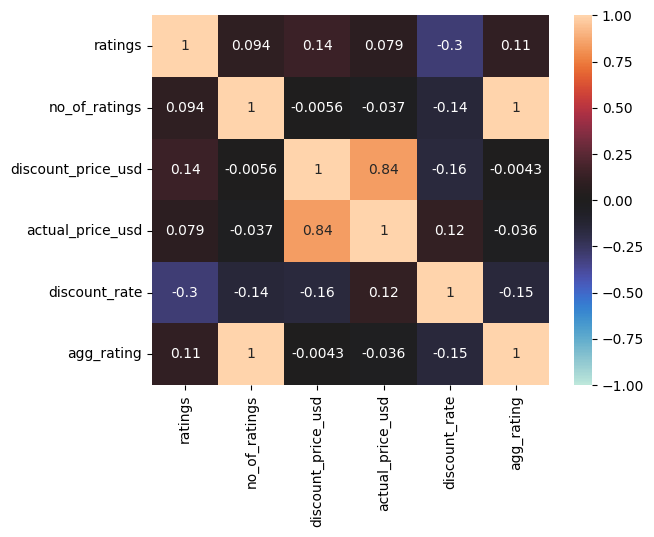

In [ ]:
sns.heatmap(amz_fashion_data.drop(amz_fashion_data.columns[0], axis=1).corr(), annot=True, vmin=-1, vmax=1, center=0)

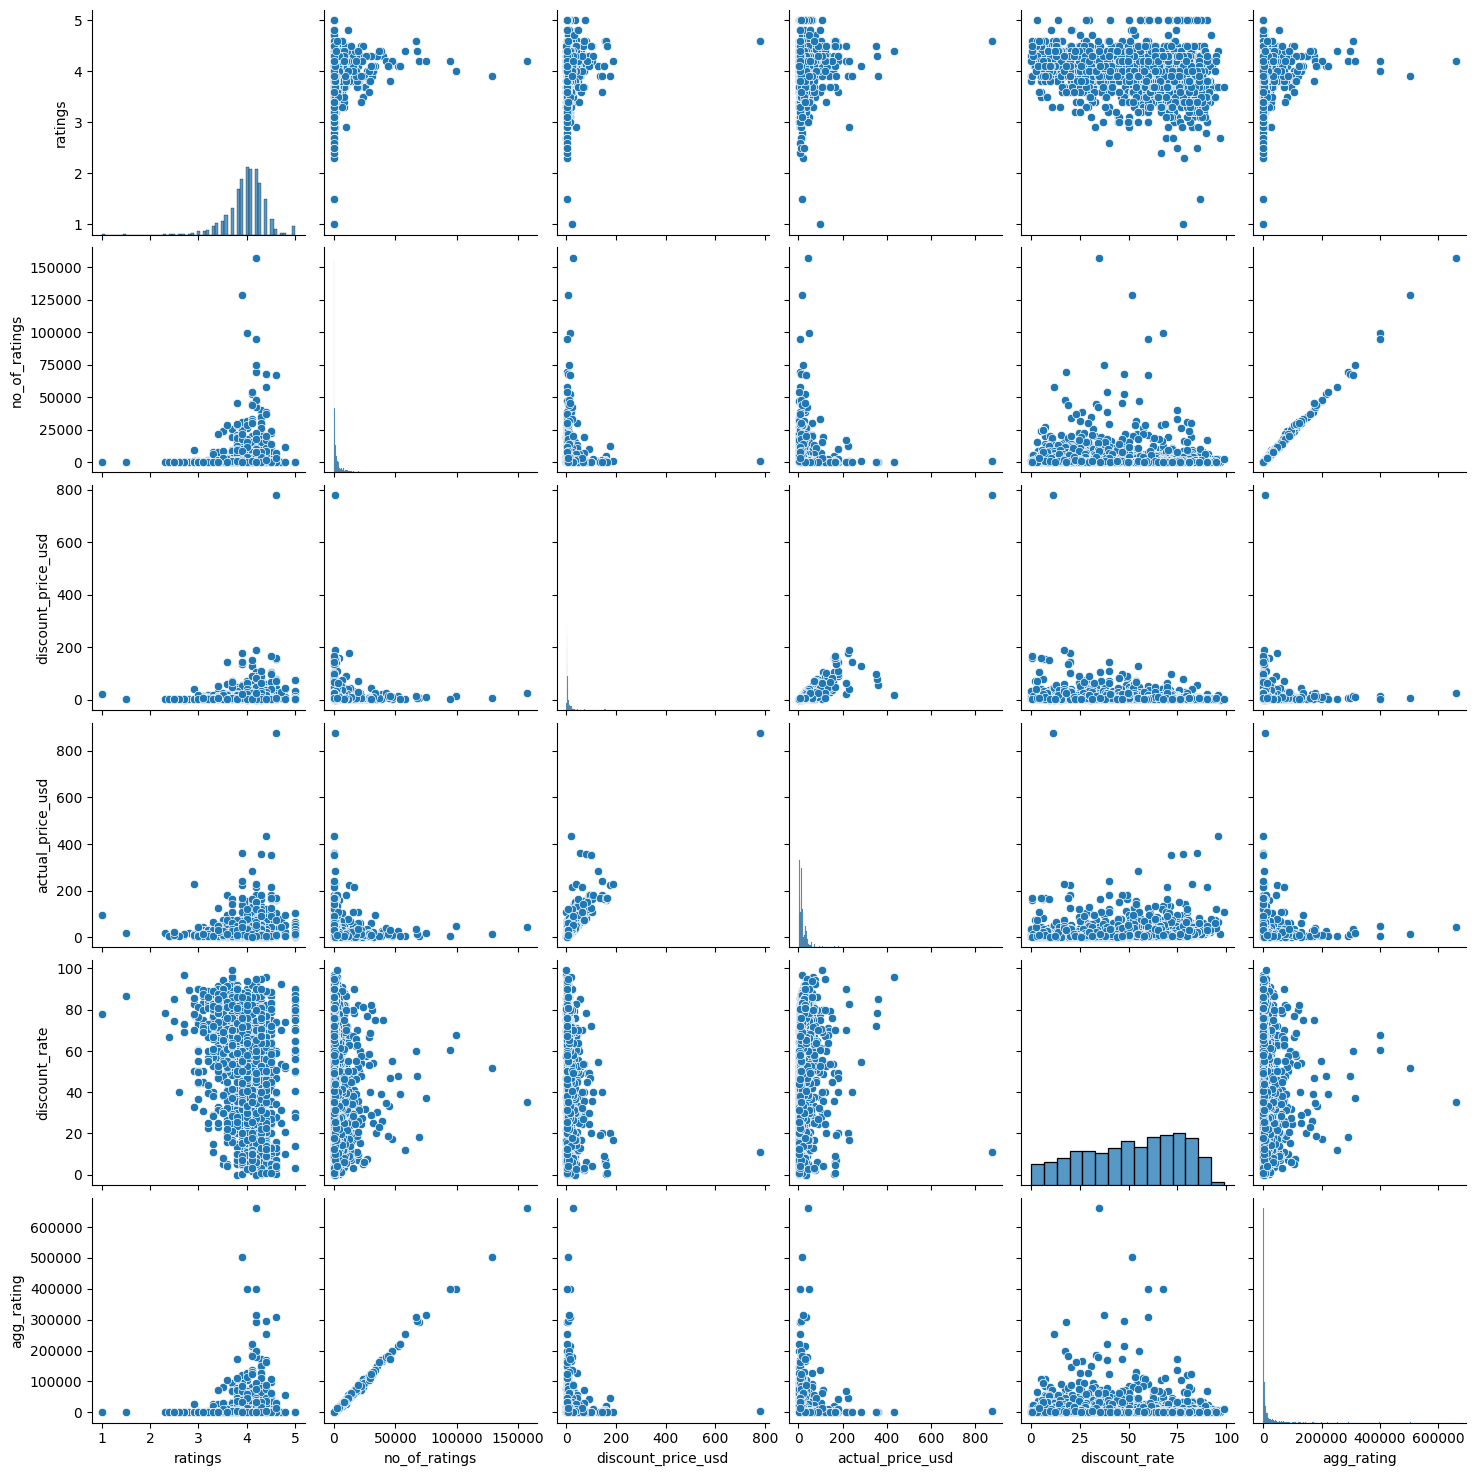

In [ ]:
sns.pairplot(amz_fashion_data)

We now look at data distribution


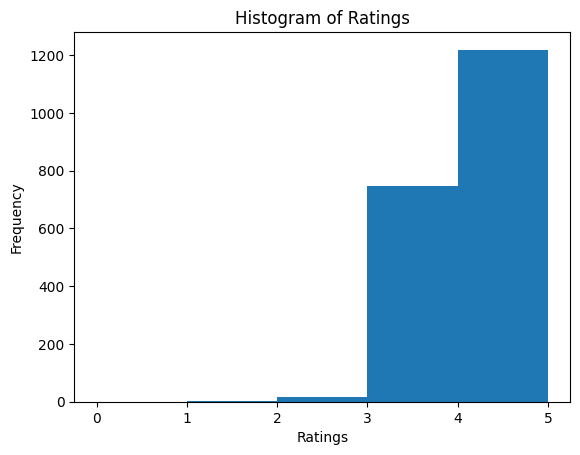

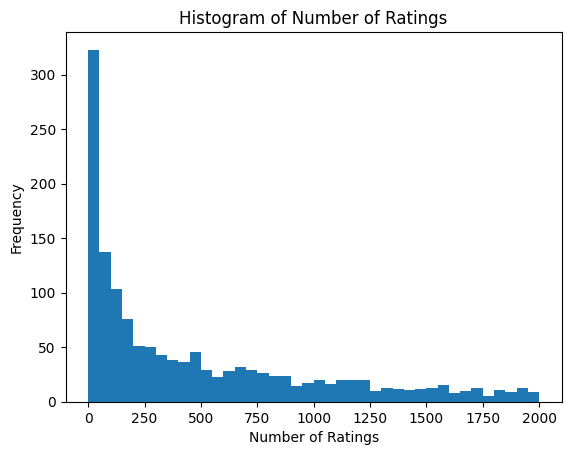

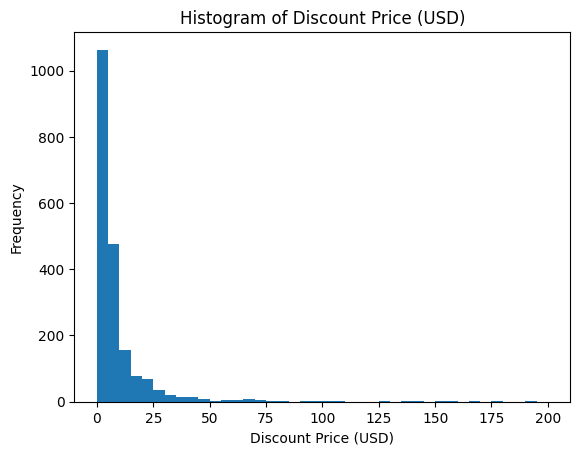

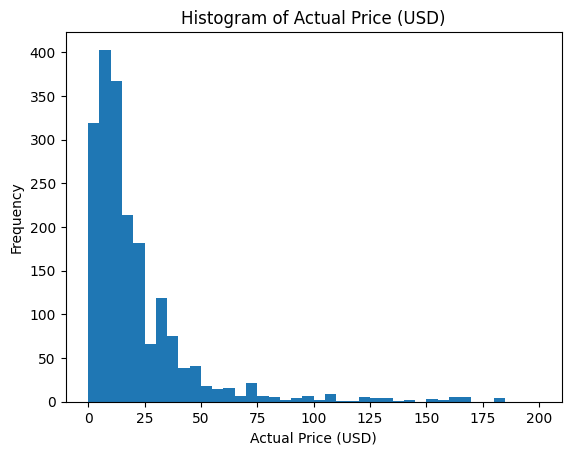

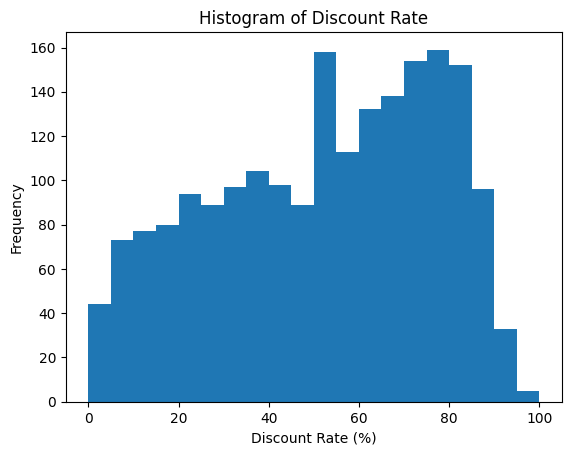

In [ ]:
# Histogram for 'ratings'
plt.hist(amz_fashion_data['ratings'], bins=range(0, 6))  # ratings range from 0 to 5
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

# Histogram for 'no_of_ratings'
plt.hist(amz_fashion_data['no_of_ratings'], bins=range(0, 2001, 50))  # no_of_ratings range from 0 to 1000
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Ratings')
plt.show()

# Histogram for 'discount_price_usd'
plt.hist(amz_fashion_data['discount_price_usd'], bins=range(0, 201, 5))  # discount_price_usd range from 0 to 200
plt.xlabel('Discount Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Discount Price (USD)')
plt.show()

# Histogram for 'actual_price_usd'
plt.hist(amz_fashion_data['actual_price_usd'], bins=range(0, 201, 5))  # actual_price_usd range from 0 to 200
plt.xlabel('Actual Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Price (USD)')
plt.show()

# Histogram for 'discount_rate'
plt.hist(amz_fashion_data['discount_rate'], bins=range(0, 101, 5))  # discount_rate range from 0 to 100
plt.xlabel('Discount Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Discount Rate')
plt.show()

##Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = amz_fashion_data.drop(columns=['name'])
scaler = MinMaxScaler()
norm_data_amz_fashion = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


In [ ]:
norm_data_amz_fashion.describe().round(2)

,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
count,1985.00,1985.00,1985.00,1985.00,1985.00,1985.00
mean,0.75,0.02,0.01,0.03,0.52,0.02
std,0.09,0.05,0.03,0.04,0.25,0.05
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.70,0.00,0.00,0.01,0.31,0.00
50%,0.75,0.00,0.01,0.01,0.55,0.00
75%,0.80,0.02,0.01,0.03,0.74,0.02
max,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
# sns.heatmap(norm_data_amz_fashion.corr(), annot=True, vmin=-1, vmax=1, center=0)

In [ ]:
# sns.pairplot(norm_data_amz_fashion)

##Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_data_amz_fashion = pd.DataFrame(scaler.fit_transform(norm_data_amz_fashion), columns=data.columns)

In [ ]:
std_data_amz_fashion.describe().round(2)

,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
count,1985.00,1985.00,1985.00,1985.00,1985.00,1985.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-8.06,-0.37,-0.40,-0.61,-2.08,-0.36
25%,-0.55,-0.35,-0.29,-0.43,-0.83,-0.35
50%,-0.01,-0.29,-0.22,-0.30,0.11,-0.29
75%,0.53,-0.06,-0.06,0.06,0.86,-0.07
max,2.67,18.30,31.74,22.86,1.92,18.57


# Television

## Number of observation
The raw data consists of __1104__ observations. After excluding null values and data with random strings in the price field and ratings, the pre-processed data consists of a total of __512__ observations.


In [ ]:
tv_raw_data = pd.read_csv("amazon_sales_prediction/dataset/Televisions.csv")
tv_raw_data.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Samsung 80 cm (32 Inches) Wondertainment Serie...,"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Samsung-Inches-Wondertai...,4.2,"8,877","₹12,990","₹22,900"
1,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/MI-inches-Ready-Android-...,4.2,"34,286","₹13,999","₹24,999"
2,Redmi 80 cm (32 inches) Android 11 Series HD R...,"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Redmi-inches-Ready-L32M6...,4.2,"47,642","₹13,999","₹24,999"
3,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/OnePlus-55-inches-Androi...,4.2,"8,290","₹38,999","₹49,999"
4,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/OnePlus-inches-Ready-And...,4.2,"36,800","₹14,999","₹19,999"


In [ ]:
tv_raw_data.describe()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,1104,1104,1104,1104,1104,614,614,703,733
unique,1085,1,1,857,1104,29,193,413,356
top,GOQii Newly Launched Smart Vital MAX HD Displa...,"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/I/41gmezKJxC...,https://www.amazon.in/Samsung-Inches-Wondertai...,4.2,1,"₹8,499","₹19,999"
freq,5,1104,1104,136,1,97,45,9,18


In [ ]:
tv_raw_data.shape

(1104, 9)

raw data has 1104 observation

In [ ]:
print(tv_raw_data.isnull().sum())

name                0
main_category       0
sub_category        0
image               0
link                0
ratings           490
no_of_ratings     490
discount_price    401
actual_price      371
dtype: int64


Drop instances that have null values for any of <b>name, rating, no_of_ratings, discount_price, actual_price</b>

In [ ]:
tv_raw_data.dropna(subset=['name', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price'], inplace=True)
tv_raw_data.shape

(534, 9)

In [ ]:
print(tv_raw_data.isnull().sum())

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64


We have now confirmed that there aren't any data will null <b>name, ratings, no_of_ratings, discount_price, actual_price</b>


We we now want to convert the currency. The dataset currently has the prices in Rupees, so we want to convert it to United States Dollars.

We also found out that some instances of <b>ratings</b> and <b>no_of_ratings</b> columns have strings that cannot be converted to a float. So we handle those cases here as well.

In [ ]:
exchange_rate = 1 / 82.99 # Exchange rate as of 02/08/2024

def rupee_to_usd(x):
  return float(x[1:].replace(",", "")) * exchange_rate
def str_to_float(x):
  return float(x.replace(",", ""))

tv_raw_data['discount_price_usd'] = tv_raw_data['discount_price'].apply(lambda x: rupee_to_usd(x))
tv_raw_data['actual_price_usd'] = tv_raw_data['actual_price'].apply(lambda x: rupee_to_usd(x))
tv_raw_data['ratings'] = tv_raw_data['ratings'].apply(lambda x: np.nan if not str(x).replace('.', '').isdigit() else float(x))
tv_raw_data['no_of_ratings'] = tv_raw_data['no_of_ratings'].apply(lambda x: np.nan if not str(x).replace(',', '').isdigit() else str_to_float(x))
tv_raw_data.dropna(subset=['no_of_ratings', 'ratings'], inplace=True)
tv_raw_data.shape


(512, 11)

After removing null and invalid values, 512 observations left

In [ ]:
tv_raw_data.describe().round(2)

,ratings,no_of_ratings,discount_price_usd,actual_price_usd
count,512.00,512.00,512.00,512.00
mean,4.05,2476.37,534.99,862.24
std,0.68,7311.87,914.45,1266.17
min,1.00,1.00,4.33,8.42
25%,3.90,13.00,138.56,275.94
50%,4.20,141.00,301.23,518.07
75%,4.40,1624.00,602.39,963.85
max,5.00,47642.00,15061.94,19217.98


We add new column, **discount_rate** and **agg_rating**

In [ ]:
tv_data = tv_raw_data[['name', 'ratings', 'no_of_ratings', 'discount_price_usd', 'actual_price_usd']].copy()
tv_data['discount_rate'] = (tv_data['actual_price_usd'] - tv_data['discount_price_usd']) / tv_data['actual_price_usd'] * 100
tv_data['agg_rating'] = tv_data['ratings'] * tv_data['no_of_ratings']
tv_data.head()

,name,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
0,Samsung 80 cm (32 Inches) Wondertainment Serie...,4.2,8877.0,156.524883,275.936860,43.275109,37283.4
1,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,4.2,34286.0,168.682974,301.229064,44.001760,144001.2
2,Redmi 80 cm (32 inches) Android 11 Series HD R...,4.2,47642.0,168.682974,301.229064,44.001760,200096.4
3,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,4.2,8290.0,469.924087,602.470177,22.000440,34818.0
4,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,4.2,36800.0,180.732618,240.980841,25.001250,154560.0


<Axes: >

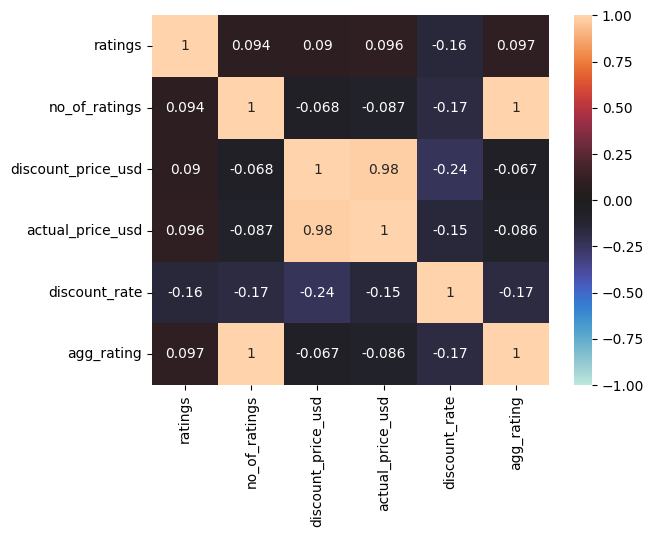

In [ ]:
sns.heatmap(tv_data.drop(tv_data.columns[0], axis=1).corr(), annot=True, vmin=-1, vmax=1, center=0)

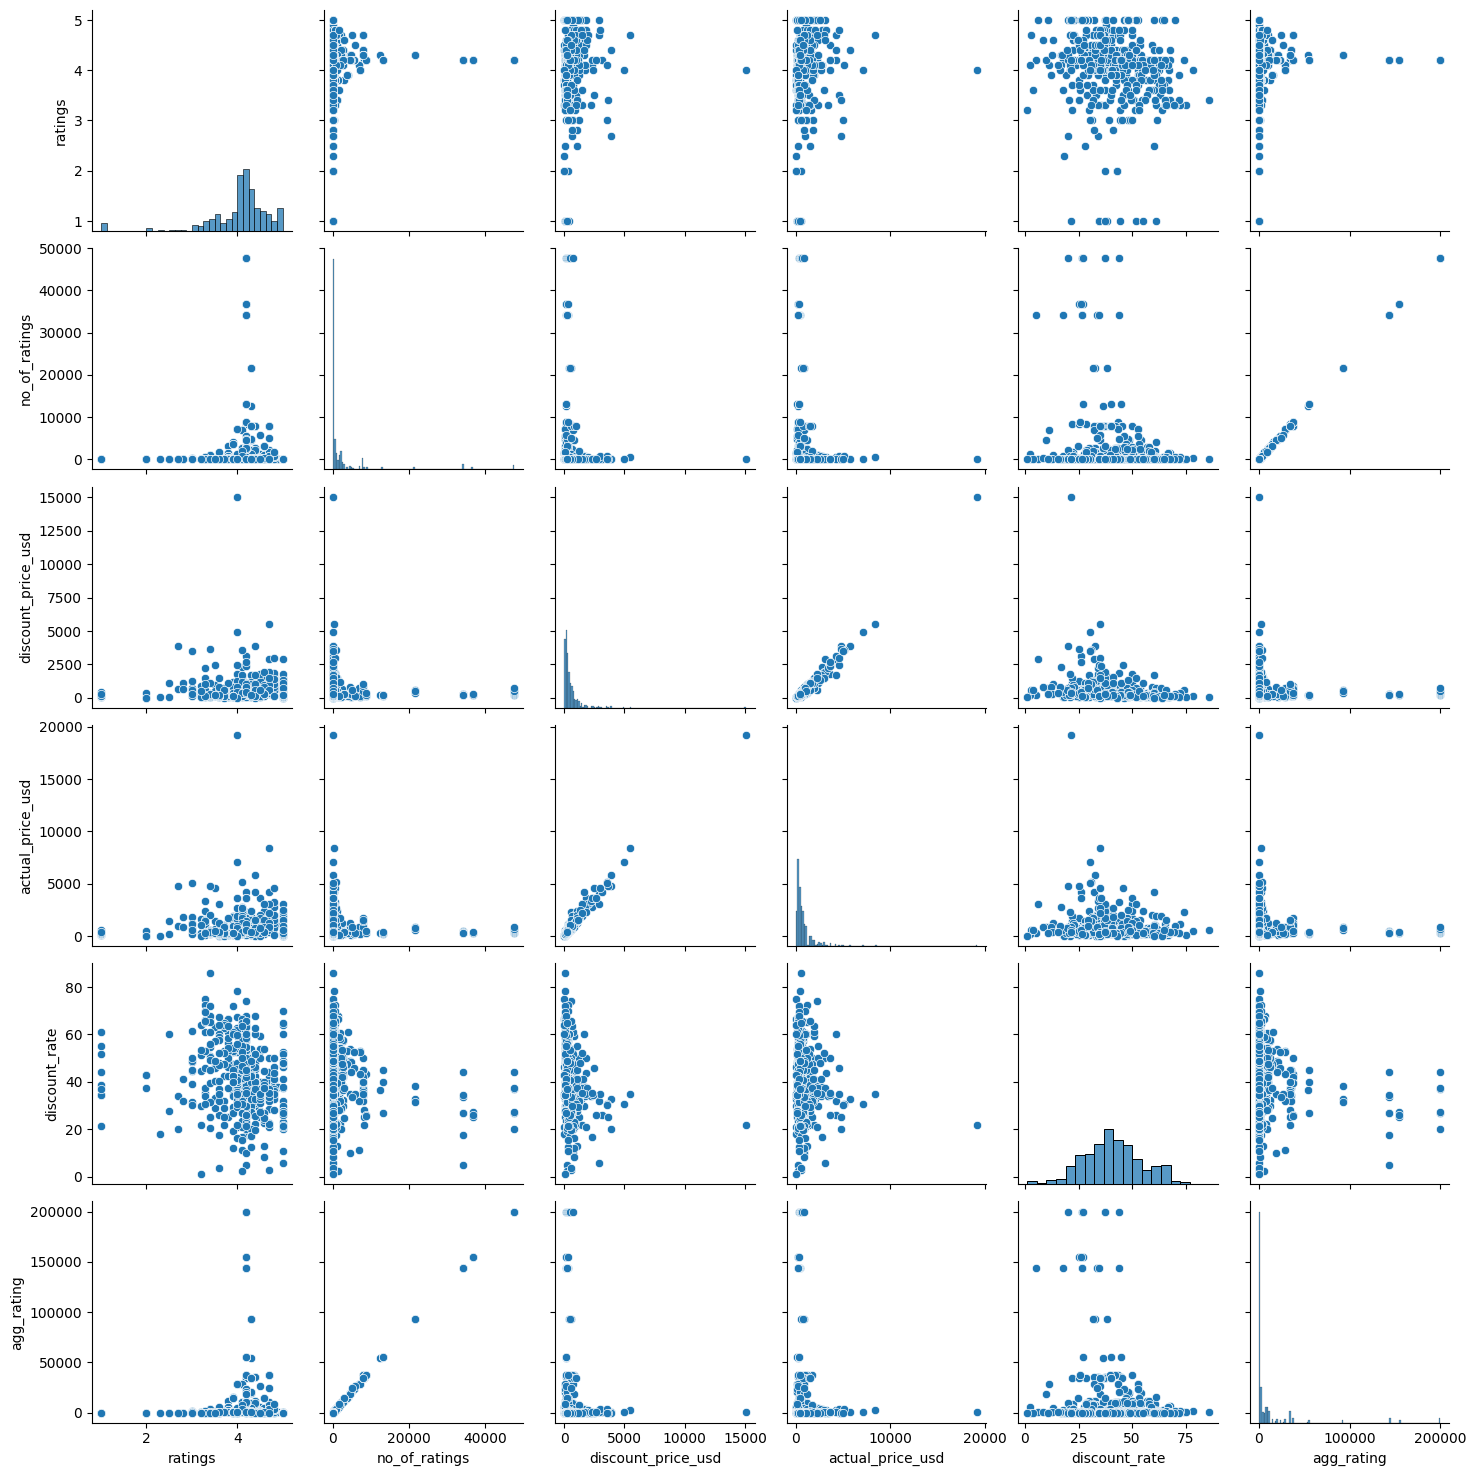

In [ ]:
sns.pairplot(tv_data)

We now look at data distribution

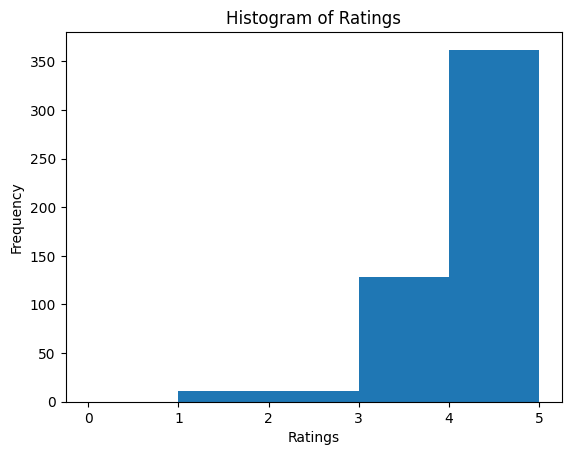

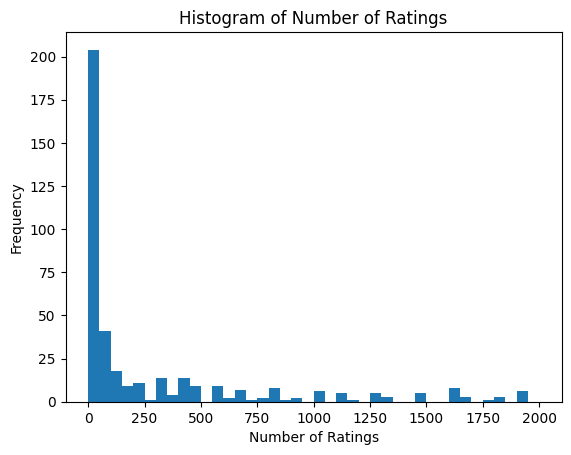

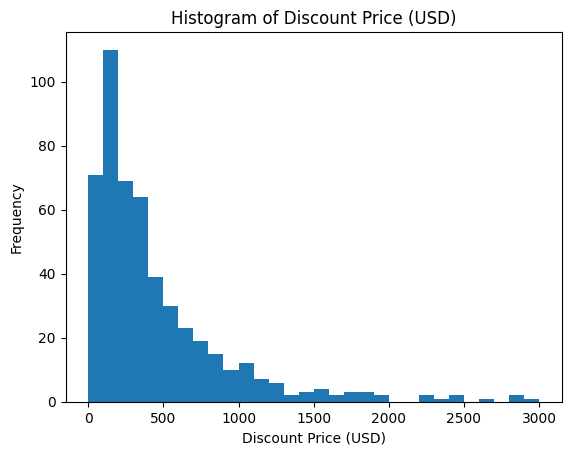

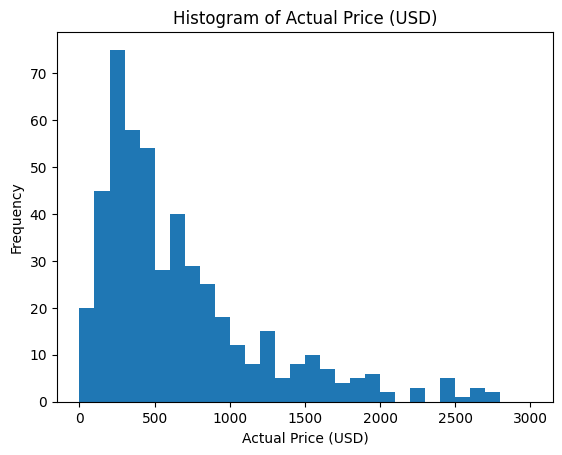

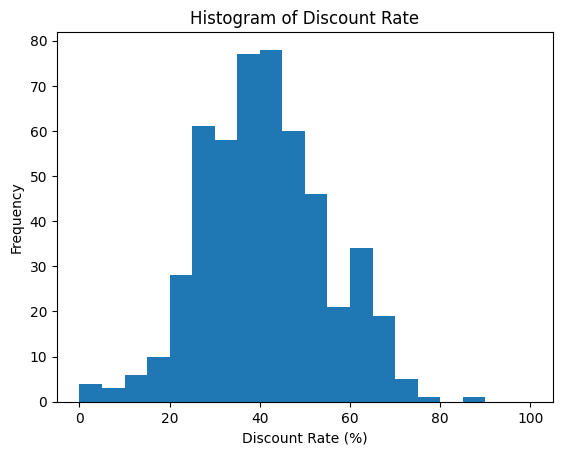

In [ ]:
# Histogram for 'ratings'
plt.hist(tv_data['ratings'], bins=range(0, 6))  # ratings range from 0 to 5
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

# Histogram for 'no_of_ratings'
plt.hist(tv_data['no_of_ratings'], bins=range(0, 2001, 50))  # no_of_ratings range from 0 to 2000
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Ratings')
plt.show()

# Histogram for 'discount_price_usd'
plt.hist(tv_data['discount_price_usd'], bins=range(0, 3001, 100))  # discount_price_usd range from 0 to 3000
plt.xlabel('Discount Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Discount Price (USD)')
plt.show()

# Histogram for 'actual_price_usd'
plt.hist(tv_data['actual_price_usd'], bins=range(0, 3001, 100))  # actual_price_usd range from 0 to 3000
plt.xlabel('Actual Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Price (USD)')
plt.show()

# Histogram for 'discount_rate'
plt.hist(tv_data['discount_rate'], bins=range(0, 101, 5))  # discount_rate range from 0 to 100
plt.xlabel('Discount Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Discount Rate')
plt.show()

##Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = tv_data.drop(columns=['name'])
scaler = MinMaxScaler()
norm_data_tv = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


In [ ]:
norm_data_tv.describe().round(2)

,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
count,512.00,512.00,512.00,512.00,512.00,512.00
mean,0.76,0.05,0.04,0.04,0.47,0.05
std,0.17,0.15,0.06,0.07,0.16,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.72,0.00,0.01,0.01,0.36,0.00
50%,0.80,0.00,0.02,0.03,0.46,0.00
75%,0.85,0.03,0.04,0.05,0.58,0.04
max,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
#sns.heatmap(norm_data.corr(), annot=True, vmin=-1, vmax=1, center=0)

In [ ]:
#sns.pairplot(norm_data)

##Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_data_tv = pd.DataFrame(scaler.fit_transform(norm_data_tv), columns=data.columns)

In [ ]:
std_data_tv.describe().round(2)

,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
count,512.00,512.00,512.00,512.00,512.00,512.00
mean,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-4.48,-0.34,-0.58,-0.67,-2.87,-0.34
25%,-0.22,-0.34,-0.43,-0.46,-0.65,-0.34
50%,0.22,-0.32,-0.26,-0.27,-0.07,-0.32
75%,0.52,-0.12,0.07,0.08,0.64,-0.11
max,1.40,6.18,15.90,14.51,3.21,6.16


# Luxury Beauty

## Number of observation
The raw data consists of __864__ observations. After excluding null values and data with random strings in the price field and ratings, the pre-processed data consists of a total of __281__ observations.


In [ ]:
luxury_raw_data = pd.read_csv("amazon_sales_prediction/dataset/Luxury Beauty.csv")
luxury_raw_data.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,O3+ Eye Circle Cream - Brightening & Whitening...,beauty & health,Luxury Beauty,https://m.media-amazon.com/images/I/31cr84-sGk...,https://www.amazon.in/O3-Eye-Circle-Cream-15g/...,3.8,"1,005",₹423,₹445
1,Biolage Hydrasource Conditioner | Paraben Free...,beauty & health,Luxury Beauty,https://m.media-amazon.com/images/I/71ZPyC85cD...,https://www.amazon.in/MATRIX-fbb-Biolage-Hydra...,4.2,342,NaN,₹180
2,"Tvaksh Faceguard Silicone Sunscreen Gel SPF30,...",beauty & health,Luxury Beauty,https://m.media-amazon.com/images/I/71fc+oPmz3...,https://www.amazon.in/Faceguard-Silicone-Sunsc...,4.3,149,₹441,₹501
3,Davidoff Cool Water For Men. Eau De Toilette S...,beauty & health,Luxury Beauty,https://m.media-amazon.com/images/I/410EqXHsCR...,https://www.amazon.in/Davidoff-Water-Toilette-...,4.2,"28,269","₹4,250","₹4,750"
4,De Fabulous Get Closer Scalp Aid Shampoo and C...,beauty & health,Luxury Beauty,https://m.media-amazon.com/images/I/51NQQCvk-f...,https://www.amazon.in/Fabulous-Closer-Shampoo-...,3.9,62,"₹2,565","₹2,700"


In [ ]:
luxury_raw_data.describe()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,864,864,864,864,864,587,587,537,847
unique,832,1,1,816,864,31,243,381,342
top,Essenza Di Wills Inizio Aqua Homme Luxury Eau ...,beauty & health,Luxury Beauty,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/O3-Eye-Circle-Cream-15g/...,Get,FREE Delivery by Amazon,"₹1,463",₹325
freq,2,864,864,4,1,67,58,9,29


In [ ]:
luxury_raw_data.shape

(864, 9)

raw data has 864 observation

In [ ]:
print(luxury_raw_data.isnull().sum())

name                0
main_category       0
sub_category        0
image               0
link                0
ratings           277
no_of_ratings     277
discount_price    327
actual_price       17
dtype: int64


Drop instances that have null values for any of <b>name, rating, no_of_ratings, discount_price, actual_price</b>

In [ ]:
luxury_raw_data.dropna(subset=['name', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price'], inplace=True)
luxury_raw_data.shape

(335, 9)

In [ ]:
print(luxury_raw_data.isnull().sum())

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64


We have now confirmed that there aren't any data will null <b>name, ratings, no_of_ratings, discount_price, actual_price</b>


We we now want to convert the currency. The dataset currently has the prices in Rupees, so we want to convert it to United States Dollars.

We also found out that some instances of <b>ratings</b> and <b>no_of_ratings</b> columns have strings that cannot be converted to a float. So we handle those cases here as well.

In [ ]:
exchange_rate = 1 / 82.99 # Exchange rate as of 02/08/2024

def rupee_to_usd(x):
  return float(x[1:].replace(",", "")) * exchange_rate
def str_to_float(x):
  return float(x.replace(",", ""))

luxury_raw_data['discount_price_usd'] = luxury_raw_data['discount_price'].apply(lambda x: rupee_to_usd(x))
luxury_raw_data['actual_price_usd'] = luxury_raw_data['actual_price'].apply(lambda x: rupee_to_usd(x))
luxury_raw_data['ratings'] = luxury_raw_data['ratings'].apply(lambda x: np.nan if not str(x).replace('.', '').isdigit() else float(x))
luxury_raw_data['no_of_ratings'] = luxury_raw_data['no_of_ratings'].apply(lambda x: np.nan if not str(x).replace(',', '').isdigit() else str_to_float(x))
luxury_raw_data.dropna(subset=['no_of_ratings', 'ratings'], inplace=True)
luxury_raw_data.shape


(281, 11)

After removing null and invalid values, 281 observations left

In [ ]:
luxury_raw_data.describe().round(2)

,ratings,no_of_ratings,discount_price_usd,actual_price_usd
count,281.00,281.00,281.00,281.00
mean,4.02,701.90,19.05,25.51
std,0.77,5363.35,22.35,29.15
min,1.00,1.00,0.41,0.59
25%,3.80,4.00,5.78,7.47
50%,4.20,33.00,9.69,12.65
75%,4.40,254.00,23.20,30.12
max,5.00,84763.00,156.28,180.73


We add new column, **discount_rate** and **agg_rating**

In [ ]:
luxury_data = luxury_raw_data[['name', 'ratings', 'no_of_ratings', 'discount_price_usd', 'actual_price_usd']].copy()
luxury_data['discount_rate'] = (luxury_data['actual_price_usd'] - luxury_data['discount_price_usd']) / luxury_data['actual_price_usd'] * 100
luxury_data['agg_rating'] = luxury_data['ratings'] * luxury_data['no_of_ratings']
luxury_data.head()

,name,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
0,O3+ Eye Circle Cream - Brightening & Whitening...,3.8,1005.0,5.097000,5.362092,4.943820,3819.0
2,"Tvaksh Faceguard Silicone Sunscreen Gel SPF30,...",4.3,149.0,5.313893,6.036872,11.976048,640.7
3,Davidoff Cool Water For Men. Eau De Toilette S...,4.2,28269.0,51.210989,57.235812,10.526316,118729.8
4,De Fabulous Get Closer Scalp Aid Shampoo and C...,3.9,62.0,30.907338,32.534040,5.000000,241.8
5,Just Herbs Anti Hairfall Natural Hair Mask wit...,4.6,612.0,6.314014,7.169538,11.932773,2815.2


<Axes: >

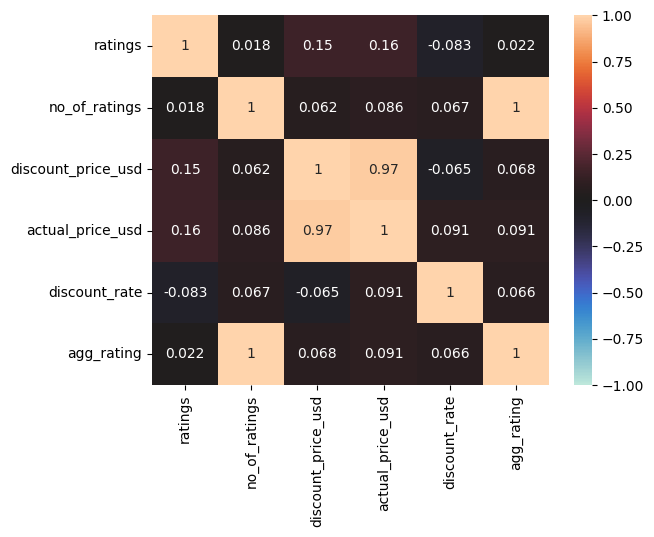

In [ ]:
sns.heatmap(luxury_data.drop(tv_data.columns[0], axis=1).corr(), annot=True, vmin=-1, vmax=1, center=0)

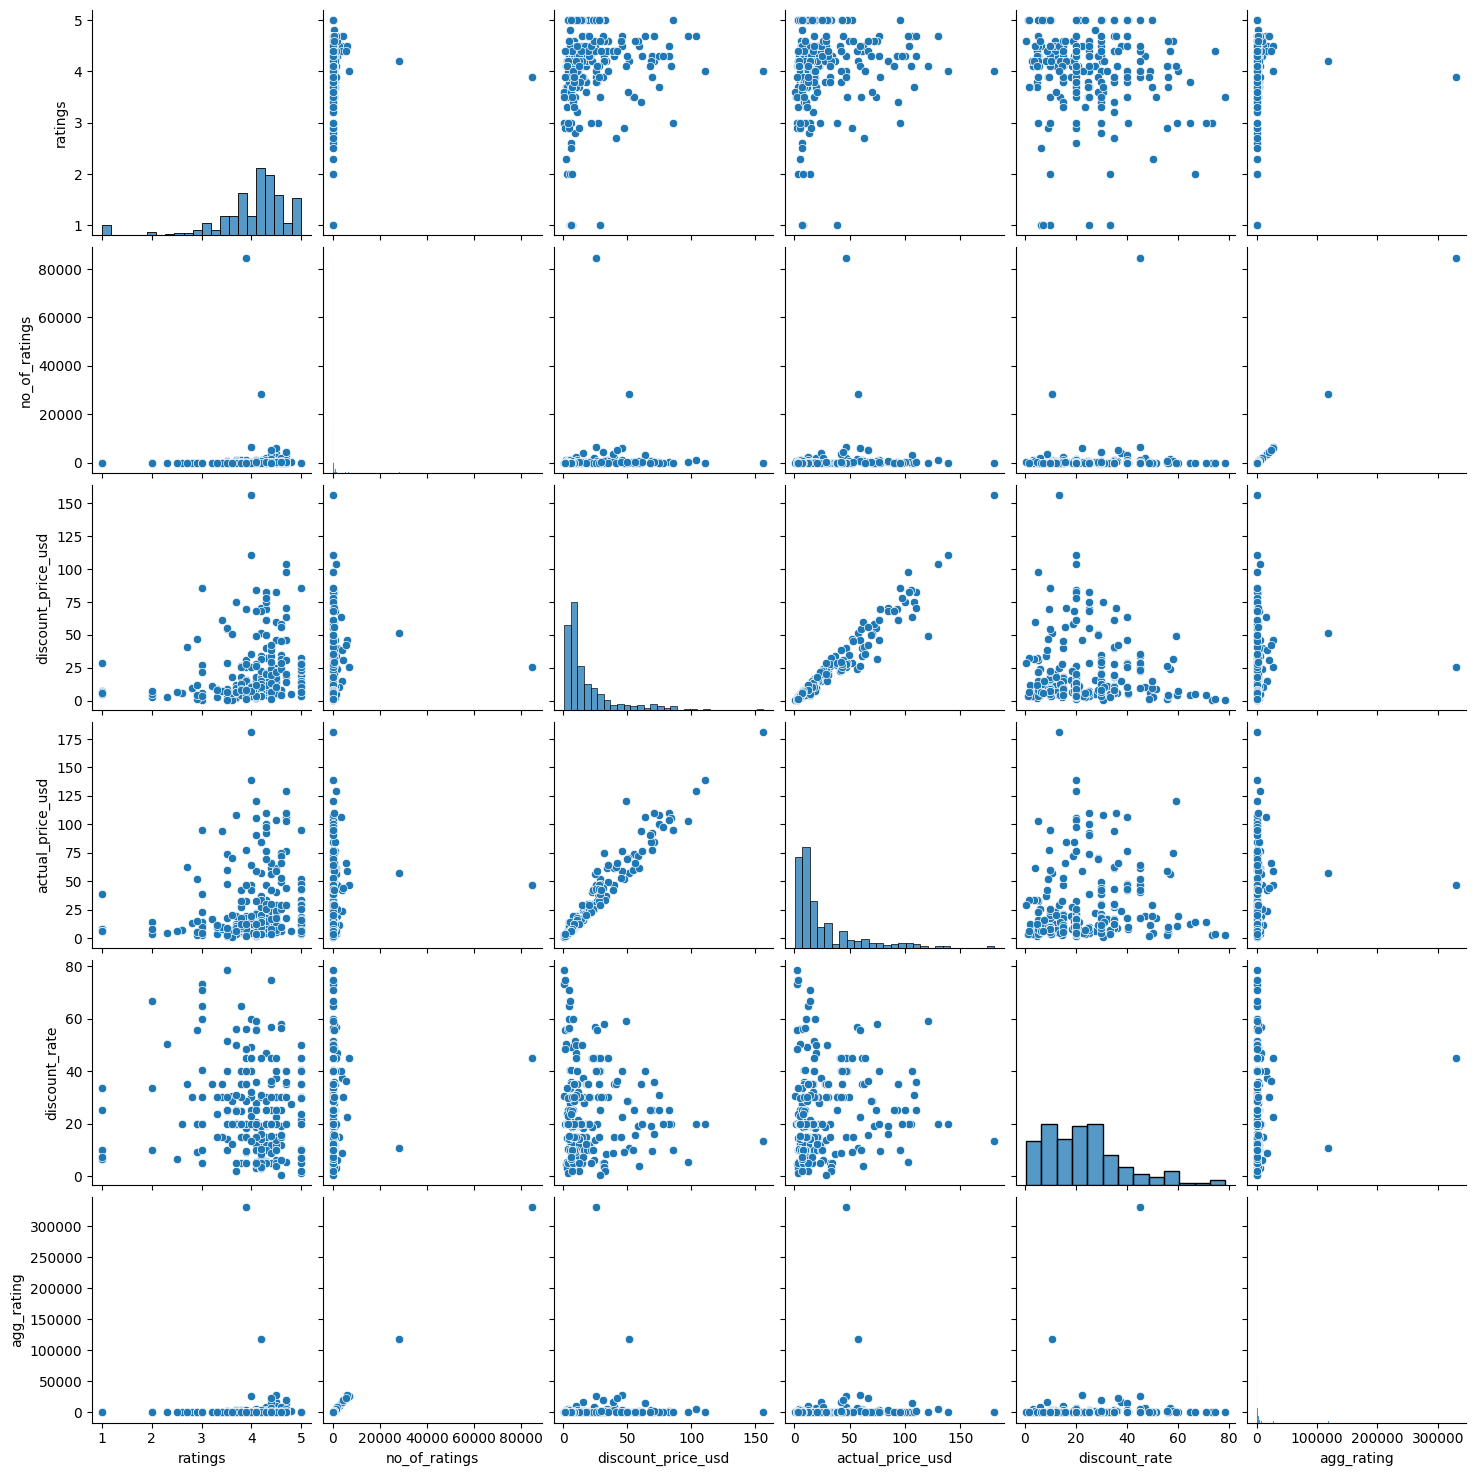

In [ ]:
sns.pairplot(luxury_data)

We now look at data distribution

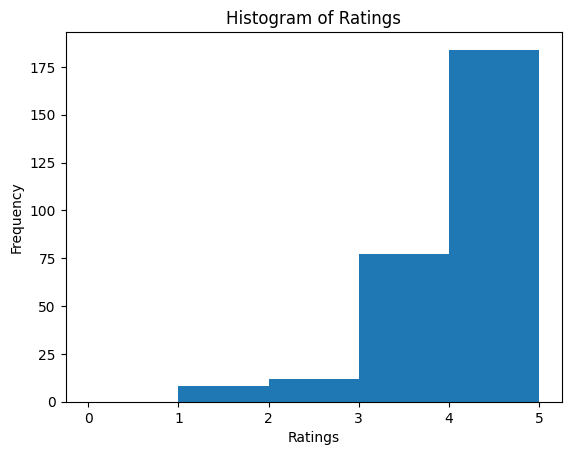

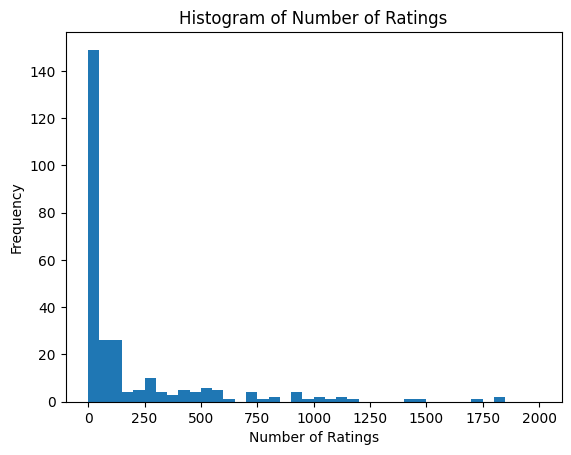

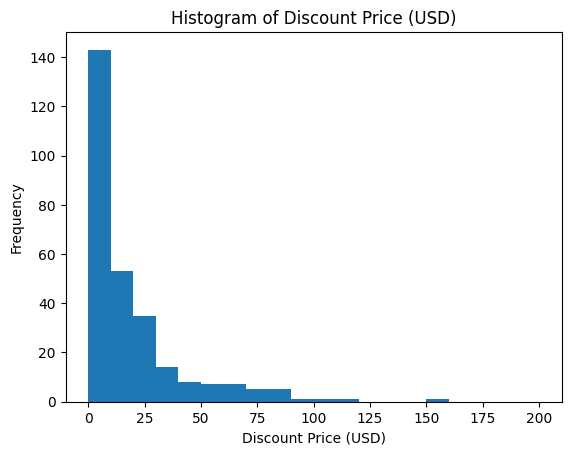

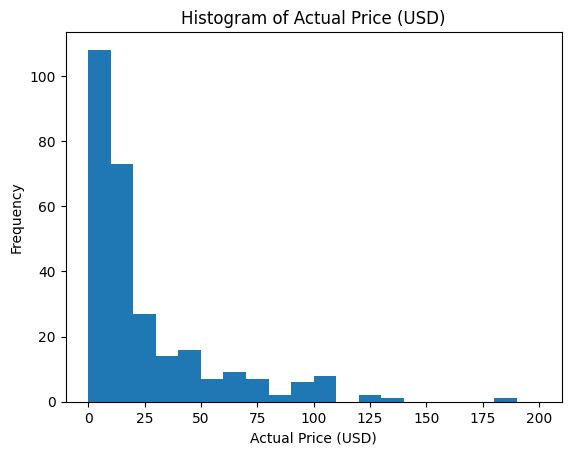

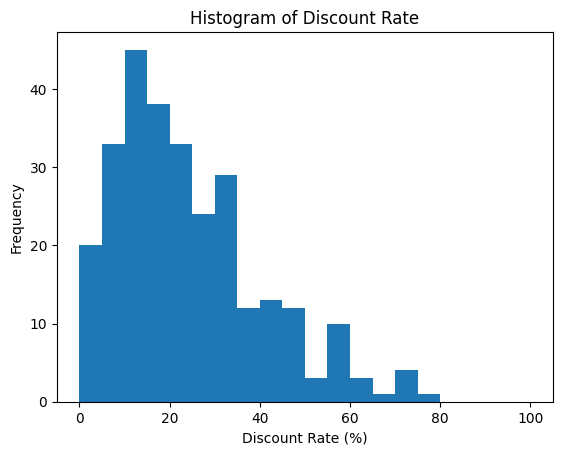

In [ ]:
# Histogram for 'ratings'
plt.hist(luxury_data['ratings'], bins=range(0, 6))  # ratings range from 0 to 5
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

# Histogram for 'no_of_ratings'
plt.hist(luxury_data['no_of_ratings'], bins=range(0, 2001, 50))  # no_of_ratings range from 0 to 2000
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Ratings')
plt.show()

# Histogram for 'discount_price_usd'
plt.hist(luxury_data['discount_price_usd'], bins=range(0, 201, 10))  # discount_price_usd range from 0 to 200
plt.xlabel('Discount Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Discount Price (USD)')
plt.show()

# Histogram for 'actual_price_usd'
plt.hist(luxury_data['actual_price_usd'], bins=range(0, 201, 10))  # actual_price_usd range from 0 to 200
plt.xlabel('Actual Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Price (USD)')
plt.show()

# Histogram for 'discount_rate'
plt.hist(luxury_data['discount_rate'], bins=range(0, 101, 5))  # discount_rate range from 0 to 100
plt.xlabel('Discount Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Discount Rate')
plt.show()

##Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = luxury_data.drop(columns=['name'])
scaler = MinMaxScaler()
norm_data_luxury = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


In [ ]:
norm_data_luxury.describe().round(2)

,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
count,281.00,281.00,281.00,281.00,281.00,281.00
mean,0.75,0.01,0.12,0.14,0.30,0.01
std,0.19,0.06,0.14,0.16,0.20,0.06
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.70,0.00,0.03,0.04,0.13,0.00
50%,0.80,0.00,0.06,0.07,0.25,0.00
75%,0.85,0.00,0.15,0.16,0.39,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
#sns.heatmap(norm_data_luxury.corr(), annot=True, vmin=-1, vmax=1, center=0)

In [ ]:
#sns.pairplot(norm_data_luxury)

##Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_data_luxury = pd.DataFrame(scaler.fit_transform(norm_data_luxury), columns=data.columns)

In [ ]:
std_data_luxury.describe().round(2)

,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
count,281.00,281.00,281.00,281.00,281.00,281.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.90,-0.13,-0.84,-0.86,-1.45,-0.14
25%,-0.28,-0.13,-0.59,-0.62,-0.82,-0.14
50%,0.24,-0.12,-0.42,-0.44,-0.23,-0.13
75%,0.50,-0.08,0.19,0.16,0.44,-0.09
max,1.27,15.70,6.15,5.33,3.44,15.54
